In [1]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



In [2]:
%config InlineBackend.figure_format = 'retina'   ##QUALITY FIGURES!!

## Degrees in Telecommunication Engineering, group 95M
## Modern Theory of Detection and Estimation
### Fall 2021

&nbsp;
&nbsp;
&nbsp;
# Linear Classification
&nbsp;
&nbsp;
&nbsp;

**Emilio Parrado Hernández**

Dept. of Signal Processing and Communications

&nbsp;
&nbsp;
&nbsp;




<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from matplotlib.colors import ListedColormap

# Fisher's Discriminant in sklearn

In [34]:
# Data generation
XX, y_true = make_blobs(n_samples=400, centers=2,
                       cluster_std=0.60, random_state=0)
y_true[y_true==0] = -1 
y_true = -y_true
rng = np.random.RandomState(13)
X_stretched = np.dot(XX, rng.randn(2, 2))

X_stretched -= np.mean(X_stretched,0)

X_train, X_test, y_train, y_test = train_test_split(
        X_stretched, y_true, test_size=0.5, random_state=40
    )

# grid of points to plot results

h=100
x_min, x_max = X_stretched[:, 0].min() - .5, X_stretched[:, 0].max() + .5
y_min, y_max = X_stretched[:, 1].min() - .5, X_stretched[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                        np.linspace(y_min, y_max, h))

X_grid = np.c_[xx.ravel(), yy.ravel()]

In [35]:
# fitting and evaluation of the model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
Z = clf.decision_function(X_grid)
test_accuracy = clf.score(X_test, y_test)

print("The accuracy in the test set is {0:.2f}".format(test_accuracy*100))


The accuracy in the test set is 100.00


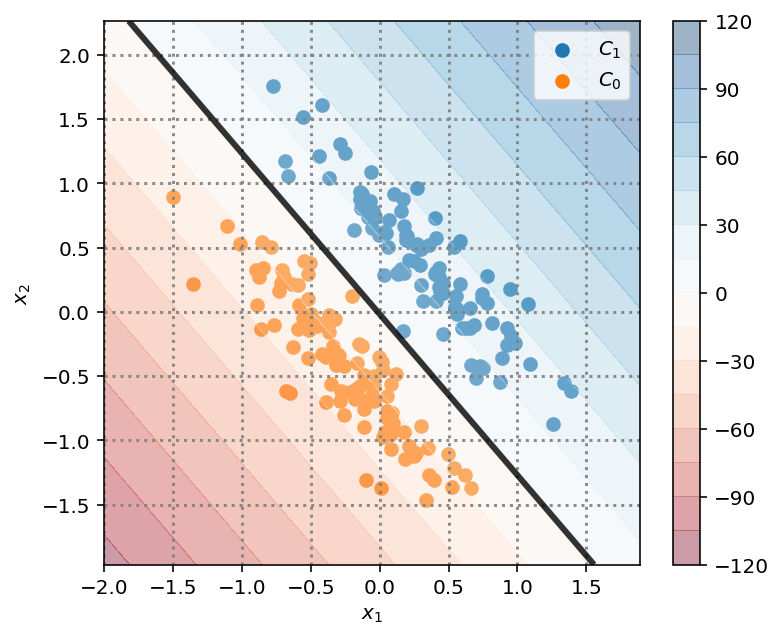

In [37]:
# plot results

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, ax = plt.subplots(1,1,figsize=(6, 5))
ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1],  s=40, label='$C_1$')
ax.scatter(X_test[y_test==-1, 0], X_test[y_test==-1, 1],  s=40, label='$C_0$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid(b=True, which='major', color='gray', alpha=0.9, linestyle='dotted', lw=1.5)
_=ax.legend()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
cc=ax.contourf(xx, yy, Z, 20, cmap=cm, alpha=.4)
fig.colorbar(cc, ax=ax)
_=ax.contour(xx, yy, Z, [0],  alpha=.8, colors='black',linewidths=3)

## Multiclass case

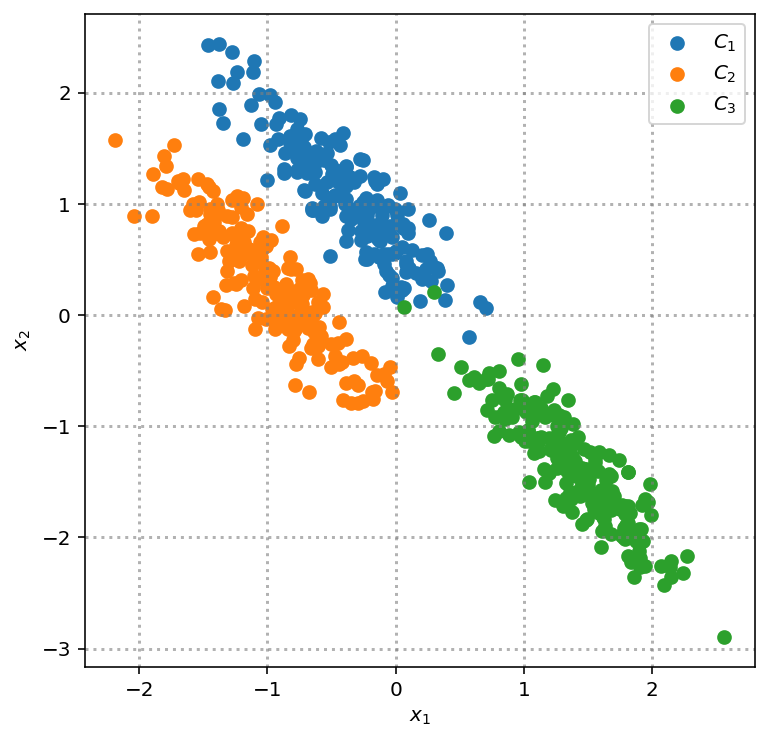

In [48]:
# data generation
XX, y_true = make_blobs(n_samples=600, centers=3,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(13)
X_stretched = np.dot(XX, rng.randn(2, 2))

X_stretched -= np.mean(X_stretched,0)

h=100
x_min, x_max = X_stretched[:, 0].min() - .5, X_stretched[:, 0].max() + .5
y_min, y_max = X_stretched[:, 1].min() - .5, X_stretched[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                        np.linspace(y_min, y_max, h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# plot all data

fig, ax = plt.subplots(1,1,figsize=(6, 6))
ax.scatter(X_stretched[y_true==0, 0], X_stretched[y_true==0, 1],  s=40, label='$C_1$')
ax.scatter(X_stretched[y_true==1, 0], X_stretched[y_true==1, 1],  s=40, label='$C_2$')
ax.scatter(X_stretched[y_true==2, 0], X_stretched[y_true==2, 1],  s=40, label='$C_3$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
_=ax.legend()


X_train, X_test, y_train, y_test = train_test_split(
        X_stretched, y_true, test_size=0.5, random_state=40
    )

In [55]:
# fitting and evaluation of the model

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print("The accuracy in the test set is {0:.2f}".format(test_accuracy*100))

Zz = clf.decision_function(X_grid)
Z = np.argmax(Zz,1)

The accuracy in the test set is 100.00


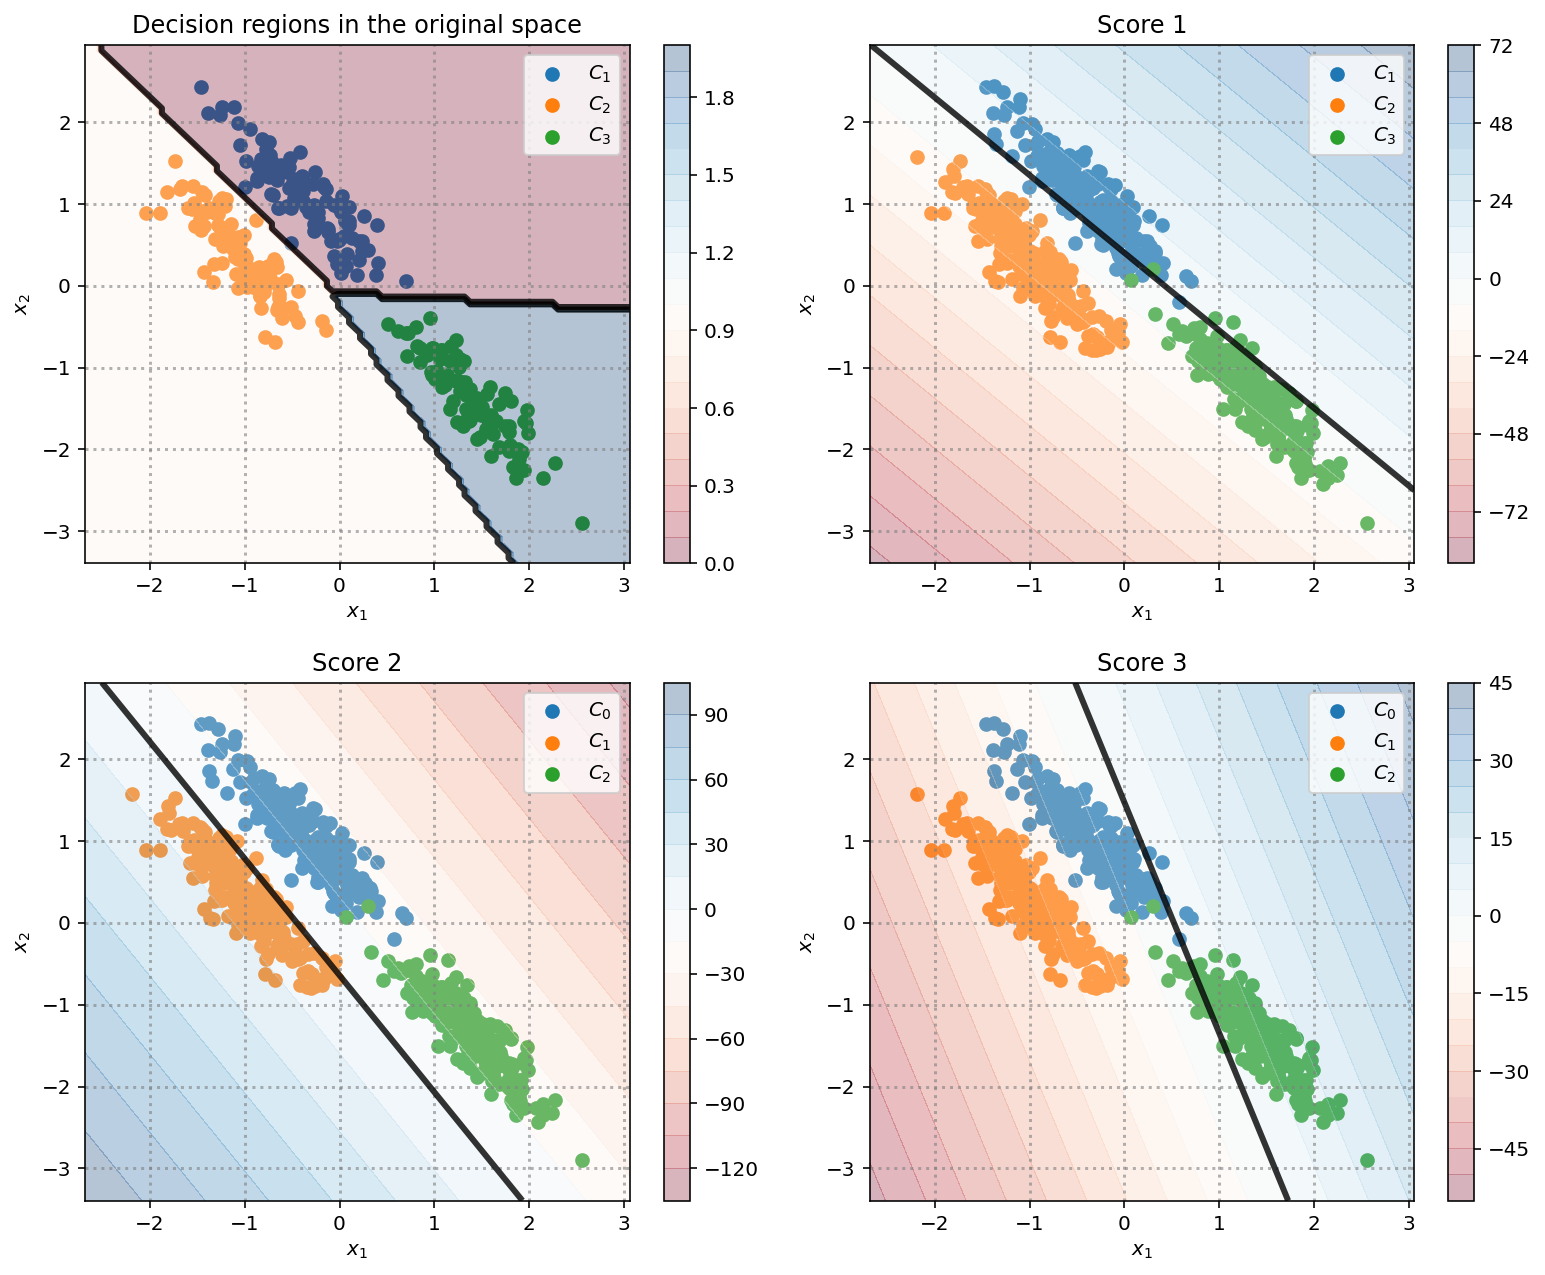

In [56]:

# plt results

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, aa = plt.subplots(2,2,figsize=(11, 9))
ax = aa[0][0]
ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1],  s=40, label='$C_1$')
ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1],  s=40, label='$C_2$')
ax.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1],  s=40, label='$C_3$')
ax.set_xlabel('$x_1$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
_=ax.legend()


        # Put the result into a color plot
Z = Z.reshape(xx.shape)
cc=ax.contourf(xx, yy, Z,20, cmap=cm, alpha=.3)
fig.colorbar(cc, ax=ax)
_=ax.contour(xx, yy, Z, [0,1],  alpha=.8, colors='black',linewidths=3)

_ = ax.set_title('Decision regions in the original space')


ax = aa[0][1]
ax.scatter(X_stretched[y_true==0, 0], X_stretched[y_true==0, 1],  s=40, label='$C_1$')
ax.scatter(X_stretched[y_true==1, 0], X_stretched[y_true==1, 1],  s=40, label='$C_2$')
ax.scatter(X_stretched[y_true==2, 0], X_stretched[y_true==2, 1],  s=40, label='$C_3$')
ax.set_xlabel('$x_1$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
_=ax.legend()


Z = Zz[:,0]
        # Put the result into a color plot
Z = Z.reshape(xx.shape)
cc=ax.contourf(xx, yy, Z,20, cmap=cm, alpha=.3)
fig.colorbar(cc, ax=ax)
_=ax.contour(xx, yy, Z, [0],  alpha=.8, colors='black',linewidths=3)

_ = ax.set_title('Score 1')

ax = aa[1][0]
ax.scatter(X_stretched[y_true==0, 0], X_stretched[y_true==0, 1],  s=40, label='$C_0$')
ax.scatter(X_stretched[y_true==1, 0], X_stretched[y_true==1, 1],  s=40, label='$C_1$')
ax.scatter(X_stretched[y_true==2, 0], X_stretched[y_true==2, 1],  s=40, label='$C_2$')
ax.set_xlabel('$x_1$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
_=ax.legend()


Z = Zz[:,1]
        # Put the result into a color plot
Z = Z.reshape(xx.shape)
cc=ax.contourf(xx, yy, Z,20, cmap=cm, alpha=.3)
fig.colorbar(cc, ax=ax)
_=ax.contour(xx, yy, Z, [0],  alpha=.8, colors='black',linewidths=3)
_ = ax.set_title('Score 2')

ax = aa[1][1]
ax.scatter(X_stretched[y_true==0, 0], X_stretched[y_true==0, 1],  s=40, label='$C_0$')
ax.scatter(X_stretched[y_true==1, 0], X_stretched[y_true==1, 1],  s=40, label='$C_1$')
ax.scatter(X_stretched[y_true==2, 0], X_stretched[y_true==2, 1],  s=40, label='$C_2$')
ax.set_xlabel('$x_1$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
_=ax.legend()


Z = Zz[:,2]
        # Put the result into a color plot
Z = Z.reshape(xx.shape)
cc=ax.contourf(xx, yy, Z, 20, cmap=cm, alpha=.3)
fig.colorbar(cc, ax=ax)
_=ax.contour(xx, yy, Z, [0],  alpha=.8, colors='black',linewidths=3)
_ = ax.set_title('Score 3')
fig.tight_layout()

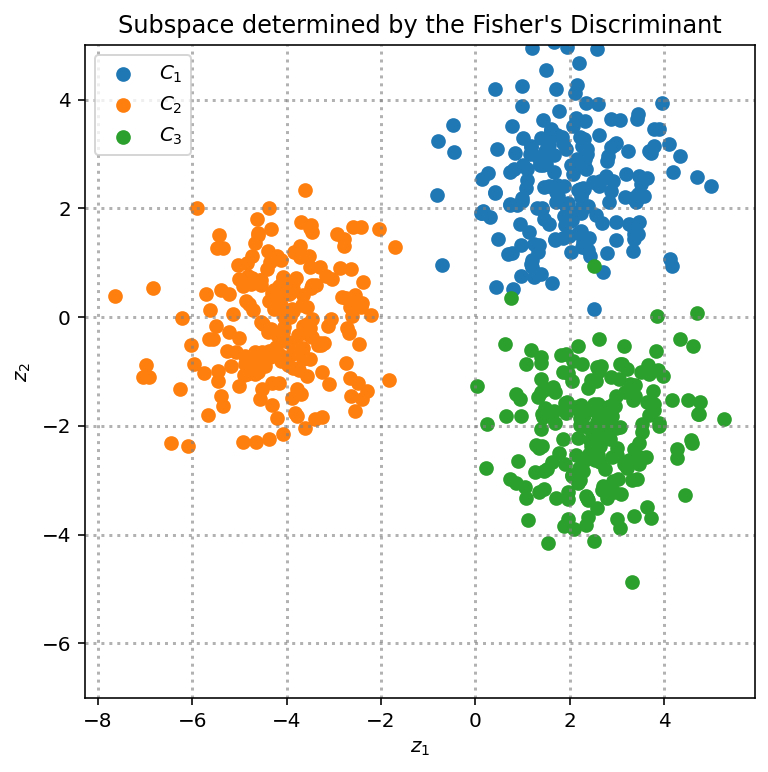

In [51]:
fig, ax = plt.subplots(1,1,figsize=(6, 6))
Z_lda = clf.transform(X_stretched) 
ax.scatter(Z_lda[y_true==0, 0], Z_lda[y_true==0, 1],  s=40, label='$C_1$')
ax.scatter(Z_lda[y_true==1, 0], Z_lda[y_true==1, 1],  s=40, label='$C_2$')
ax.scatter(Z_lda[y_true==2, 0], Z_lda[y_true==2, 1],  s=40, label='$C_3$')
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
_ = ax.legend()
_ = ax.set_title("Subspace determined by the Fisher's Discriminant")
_ = ax.set_ylim(-7,5)

# Logistic Regression in sklearn

In [57]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# data generation

XX, y_true = make_blobs(n_samples=400, centers=2,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(13)
X_stretched = np.dot(XX, rng.randn(2, 2))

X_stretched -= np.mean(X_stretched,0)


X_train, X_test, y_train, y_test = train_test_split(
        X_stretched, y_true, test_size=0.5, random_state=40
    )

h=100
x_min, x_max = X_stretched[:, 0].min() - .5, X_stretched[:, 0].max() + .5
y_min, y_max = X_stretched[:, 1].min() - .5, X_stretched[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                        np.linspace(y_min, y_max, h))

X_grid = np.c_[xx.ravel(), yy.ravel()]





In [58]:
# fitting and evaluation of the model

clf = LogisticRegression()
clf.fit(X_stretched, y_true)

Z = clf.predict_proba(X_grid)[:,0]
test_accuracy = clf.score(X_test, y_test)

print("The accuracy in the test set is {0:.2f}".format(test_accuracy*100))



The accuracy in the test set is 100.00


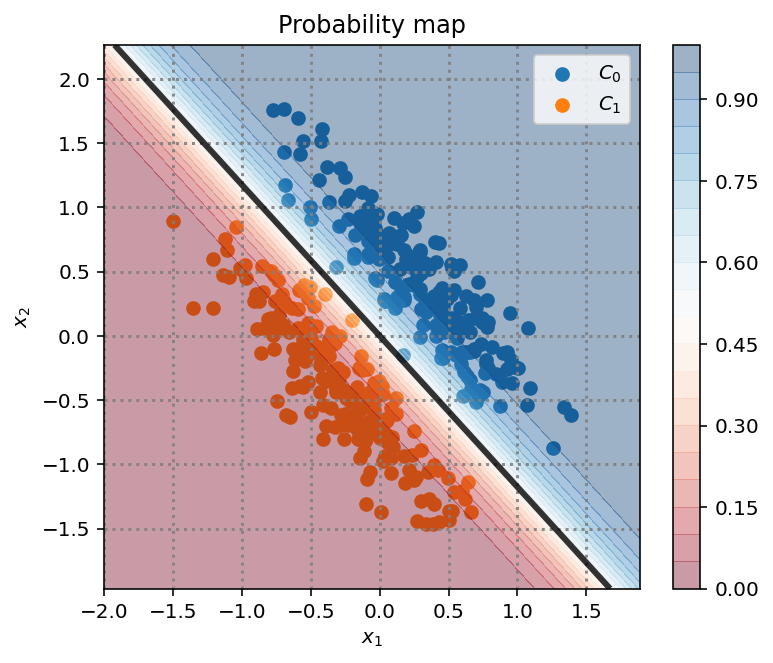

In [62]:
# plotting

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, ax = plt.subplots(1,1,figsize=(6, 5))
ax.scatter(X_stretched[y_true==0, 0], X_stretched[y_true==0, 1],  s=40, label='$C_0$')
ax.scatter(X_stretched[y_true==1, 0], X_stretched[y_true==1, 1],  s=40, label='$C_1$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid(b=True, which='major', color='gray', alpha=0.9, linestyle='dotted', lw=1.5)
_=ax.legend()




        # Put the result into a color plot
Z = Z.reshape(xx.shape)
cc=ax.contourf(xx, yy, Z,20, cmap=cm, alpha=.4)
fig.colorbar(cc, ax=ax)
_=ax.contour(xx, yy, Z, [0.5],  alpha=.8, colors='black',linewidths=3)
_=ax.set_title('Probability map')

# Nonlinear classification

In [64]:
h = 0.02  # step size in the mesh


datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
]


In [65]:
from sklearn.preprocessing import PolynomialFeatures



DATASET 1
Linear model
The accuracy in the test set is 87.50

Model with 2nd degree polynomial noninearities
The accuracy in the test set is 85.00

Model with 5th degree polynomial noninearities
The accuracy in the test set is 95.00

DATASET 2
Linear model
The accuracy in the test set is 40.00

Model with 2nd degree polynomial noninearities
The accuracy in the test set is 90.00

Model with 5th degree polynomial noninearities
The accuracy in the test set is 80.00



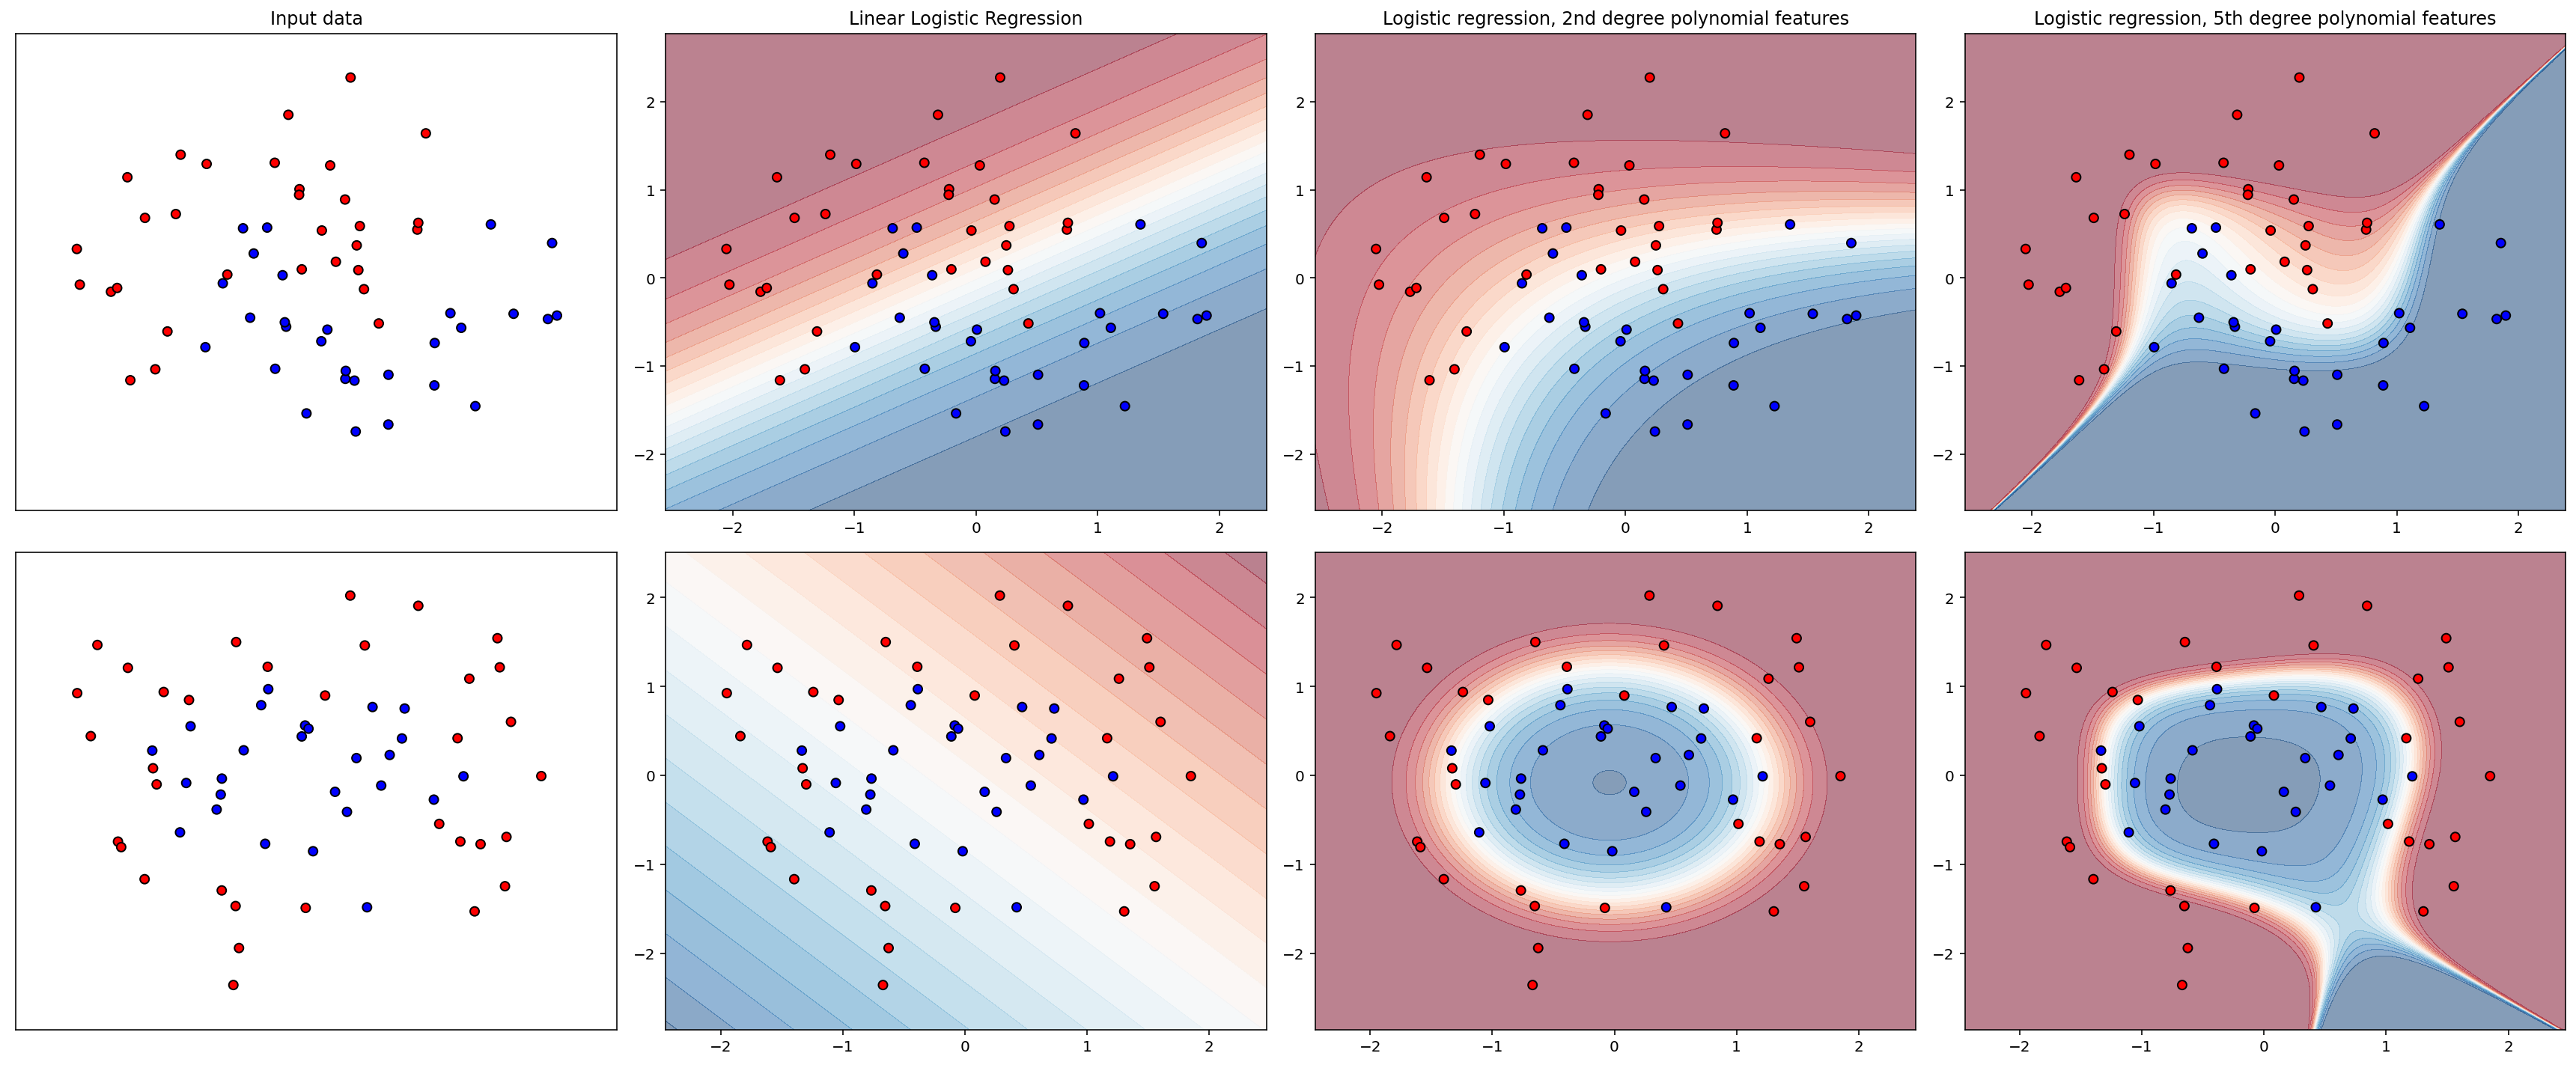

In [71]:
figure, aa = plt.subplots(len(datasets), 4,figsize=(24, 10))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    print("DATASET {0:d}".format(ds_cnt+1))
    print("==========")
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
        
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = aa[ds_cnt][0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    ########################
    # Linear classification
    ########################
    
    LR = LogisticRegression().fit(X_train, y_train)
    
    test_accuracy = LR.score(X_test, y_test)
    print("Linear model")
    print("The accuracy in the test set is {0:.2f}".format(test_accuracy*100))


    ax = aa[ds_cnt][1]
    if ds_cnt == 0:
        ax.set_title("Linear Logistic Regression")
    Z1 = LR.predict_proba(X_grid)[:,1]
    # Put the result into a color plot
    Z1 = Z1.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z1,20, cmap=cm, alpha=0.5)
    # Plot the training points
    ax.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
    )

    ###########################
    # Quadratic classification
    ##########################
    
    # Extend X with nolinear columns
    #################################
    
    poly_grado2 = PolynomialFeatures(2) # second degree polynomial
    X02_train = poly_grado2.fit_transform(X_train)
    X02_test = poly_grado2.transform(X_test)
    
    # fit linear model in the extended feature set
    LR2 = LogisticRegression().fit(X02_train, y_train)
    test_accuracy = LR2.score(X02_test, y_test)
    print("")
    print("Model with 2nd degree polynomial noninearities")
    print("The accuracy in the test set is {0:.2f}".format(test_accuracy*100))

    # evaluate the model in the grid points
    grid2 = poly_grado2.transform(X_grid)
    Z1 = LR2.predict_proba(grid2)[:,1]
    
    ax = aa[ds_cnt][2]
    if ds_cnt == 0:
        ax.set_title("Logistic regression, 2nd degree polynomial features")
    
    # Put the result into a color plot
    Z1 = Z1.reshape(xx.shape)

    ax.contourf(xx, yy, Z1, 20, cmap=cm, alpha=0.5)
    ax.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
    )
    
   
    #####################################
    # 5th degree features classification
    #####################################
    
    
    
    ax = aa[ds_cnt][3]
    if ds_cnt == 0:
        ax.set_title("Logistic regression, 5th degree polynomial features")
        
    # Extend X with nolinear columns
    #################################
    poly_grado8 = PolynomialFeatures(5)
    X08_train = poly_grado8.fit_transform(X_train)
    X08_test = poly_grado8.transform(X_test)
    LR8 = LogisticRegression().fit(X08_train, y_train)
    
    test_accuracy = LR8.score(X08_test, y_test)
    print("")
    print("Model with 5th degree polynomial noninearities")
    print("The accuracy in the test set is {0:.2f}".format(test_accuracy*100))

    grid8 = poly_grado8.transform(X_grid)
    
    Z1 = LR8.predict_proba(grid8)[:,1]
    # Put the result into a color plot
    Z1 = Z1.reshape(xx.shape)

    ax.contourf(xx, yy, Z1, 20, cmap=cm, alpha=0.5)
    ax.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
    )
    print("")
    
    
    
plt.tight_layout()
